In [1]:
# Bloco 1: Instalação e Importação
!pip install numpy matplotlib scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

print("Bibliotecas instaladas!")

Bibliotecas instaladas!


In [2]:
# Bloco 2: Preparação dos Dados
dados_spam = [
    ['Contém', 'Sim', 'Novo', 1],
    ['Não contém', 'Não', 'Novo', 1],
    ['Não contém', 'Sim', 'Antigo', 0],
    ['Contém', 'Não', 'Novo', 0],
    ['Contém', 'Sim', 'Novo', 1],
    ['Contém', 'Sim', 'Antigo', 1],
    ['Não contém', 'Não', 'Antigo', 0],
    ['Contém', 'Sim', 'Antigo', 1],
    ['Não contém', 'Sim', 'Antigo', 0],
    ['Não contém', 'Sim', 'Antigo', 0]
]

X = np.array([linha[:3] for linha in dados_spam])
y = np.array([linha[3] for linha in dados_spam])

print("Dados carregados!")
print("Exemplo X:", X[0])
print("Exemplo y:", y[0])

Dados carregados!
Exemplo X: ['Contém' 'Sim' 'Novo']
Exemplo y: 1


In [3]:
# Bloco 3: Pré-processamento
le_palavras = LabelEncoder()
le_links = LabelEncoder()
le_dominio = LabelEncoder()

X[:, 0] = le_palavras.fit_transform(X[:, 0])
X[:, 1] = le_links.fit_transform(X[:, 1])
X[:, 2] = le_dominio.fit_transform(X[:, 2])

XX = pd.DataFrame(X, columns=['Palavras-chave', 'Links', 'Domínio'])
yy = pd.DataFrame(y, columns=['Spam'])

print("\nDados convertidos:")
print(XX.head())

print("\nMapeamentos:")
print("Palavras-chave:", dict(zip(le_palavras.classes_, le_palavras.transform(le_palavras.classes_))))
print("Links:", dict(zip(le_links.classes_, le_links.transform(le_links.classes_))))
print("Domínio:", dict(zip(le_dominio.classes_, le_dominio.transform(le_dominio.classes_))))


Dados convertidos:
  Palavras-chave Links Domínio
0              0     1       1
1              1     0       1
2              1     1       0
3              0     0       1
4              0     1       1

Mapeamentos:
Palavras-chave: {np.str_('Contém'): np.int64(0), np.str_('Não contém'): np.int64(1)}
Links: {np.str_('Não'): np.int64(0), np.str_('Sim'): np.int64(1)}
Domínio: {np.str_('Antigo'): np.int64(0), np.str_('Novo'): np.int64(1)}


In [4]:
# Bloco 4: Modelagem
arvore_spam = DecisionTreeClassifier(criterion='entropy', max_depth=3)
arvore_spam.fit(XX, yy)

print("\nModelo treinado!")
print("Acurácia:", arvore_spam.score(XX, yy))


Modelo treinado!
Acurácia: 1.0


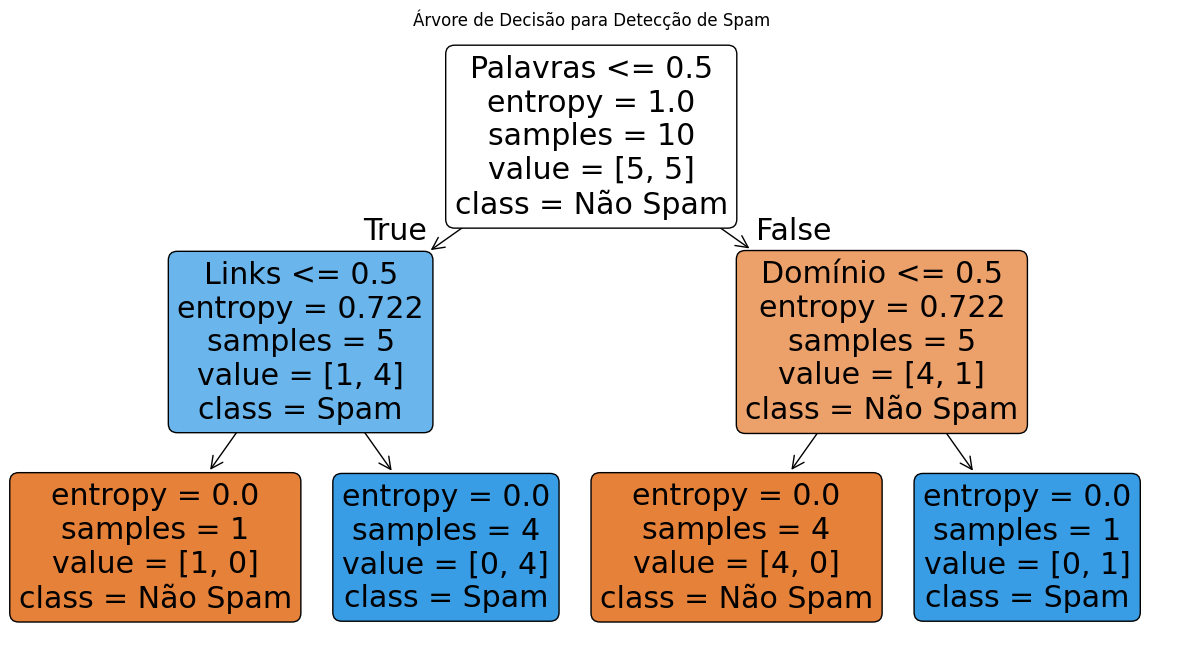

In [5]:
# Bloco 5: Visualização
plt.figure(figsize=(15,8))
plot_tree(arvore_spam,
          feature_names=['Palavras', 'Links', 'Domínio'],
          class_names=['Não Spam', 'Spam'],
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão para Detecção de Spam")
plt.show()

In [6]:
# Bloco 6: Regras
print("\nRegras de decisão:")
print(export_text(arvore_spam,
                feature_names=['Palavras', 'Links', 'Domínio'],
                show_weights=True))


Regras de decisão:
|--- Palavras <= 0.50
|   |--- Links <= 0.50
|   |   |--- weights: [1.00, 0.00] class: 0
|   |--- Links >  0.50
|   |   |--- weights: [0.00, 4.00] class: 1
|--- Palavras >  0.50
|   |--- Domínio <= 0.50
|   |   |--- weights: [4.00, 0.00] class: 0
|   |--- Domínio >  0.50
|   |   |--- weights: [0.00, 1.00] class: 1



In [7]:
# Bloco 7: Previsões
def prever_spam(palavra, link, dominio):
    p = le_palavras.transform([palavra])[0]
    l = le_links.transform([link])[0]
    d = le_dominio.transform([dominio])[0]
    return arvore_spam.predict([[p, l, d]])[0]

# Exemplo 1
print("\nExemplo 1 - Contém, Sim, Novo:",
      "Spam" if prever_spam('Contém', 'Sim', 'Novo') else "Não Spam")

# Exemplo 2
print("Exemplo 2 - Não contém, Não, Antigo:",
      "Spam" if prever_spam('Não contém', 'Não', 'Antigo') else "Não Spam")


Exemplo 1 - Contém, Sim, Novo: Spam
Exemplo 2 - Não contém, Não, Antigo: Não Spam


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
